In [1]:
%load_ext autoreload
%autoreload 2
from typing import Set
import sys 
sys.path.append('.')
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from correlation_analysis import correlation_analysis_target_acc_vs_ensemble_weight

# Correlation Analyis: 
## Do aggregation weights correlate with target performance of individual models?

**Best result:** strong, significant positive correlation. (=Better models on target have higher aggregation weights.)

**Significance test:** select `alternative=two-sided`


**Procedure:**
1. load results table + ensemble weights
2. average across seeds
3. select all columns from ew_df in results table
4. select target accuracy from results table
5. perform correlation analysis between target, and all rows in ensemble methods
6. save results in new table with multi-index: domains, ensemble_method + columns: pearson correlation coefficient + p-value for `alternative=two-sided`

### Load preprocessed results of all experiments
To perform this analysis, we must at first load all results. 
For an explanation of how to best preprocess, store and load experiment results, have a look at this repo: [https://github.com/maximilianmbeck/viz](https://github.com/maximilianmbeck/viz).

In [2]:
# load all results
results_file = './data/iclr_all_results_dfs.p'
with open(results_file, 'rb') as f:
    # results are stored as a nested dictionary
    results_dict = pickle.load(f)
results_dict.keys()

dict_keys(['MINI_DOMAIN_NET', 'WISDM', 'HAR', 'HHAR_SA', 'AMAZON_REVIEWS', 'EEG', 'MOONS'])

### Run correlation on every experiment and combine results in a data frame

In [3]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings from correlation analysis
alternative_hypothesis = 'two-sided'
index_tuples = []
correlation_analysis_list = []
correlation_analysis_dict = {}
for dataset, da_methods_dict in results_dict.items():
    ca_dataset = {}
    for da_method, result_df_dict in tqdm(da_methods_dict.items(), desc=f'CA for {dataset}'):
        acc_df = result_df_dict['acc_df']
        ew_df = result_df_dict['ew_df']
        index_tuples.append((dataset, da_method))
        ca_df = correlation_analysis_target_acc_vs_ensemble_weight(acc_df, ew_df, alternative_hypothesis)
        ca_dataset[da_method] = ca_df
        correlation_analysis_list.append(ca_df)
    correlation_analysis_dict[dataset] = ca_dataset

# combine all results in one dataframe
ca_index = pd.MultiIndex.from_tuples(index_tuples, names=['dataset', 'da_method'])
res_df = pd.concat(correlation_analysis_list, axis=0, keys=ca_index)

CA for MOONS: 100%|██████████| 11/11 [00:00<00:00, 113.80it/s]


In [4]:
res_df

corr_coeff  \
dataset         da_method domains              ensemble_methods     seed               
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                  1      -0.781456   
                                                                    2      -0.178394   
                                                                    3      -0.249080   
                                               dev                  1      -0.453780   
                                                                    2      -0.098648   
...                                                                              ...   
MOONS           DSAN      0_src-1_tgt          target_majority_reg  2       0.061475   
                                                                    3       0.029966   
                                               target_majority_vote 1            NaN   
                                                                    2            NaN   
                                                                    3            NaN   

                                                                             p_val  \
dataset         da_method domains              ensemble_methods     seed             
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                  1     0.022005   
                                                                    2     0.672541   
                                                                    3     0.551932   
                                               dev                  1     0.258747   
                                                                    2     0.816232   
...                                                                            ...   
MOONS           DSAN      0_src-1_tgt          target_majority_reg  2     0.834628   
                                                                    3     0.919001   
                                               target_majority_vote 1          NaN   
                                                                    2          NaN   
                                                                    3          NaN   

                                                                            ci_low  \
dataset         da_method domains              ensemble_methods     seed             
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                  1    -0.958378   
                                                                    2    -0.784454   
                                                                    3    -0.811346   
                                               dev                  1    -0.877771   
                                                                    2    -0.751108   
...                                                                            ...   
MOONS           DSAN      0_src-1_tgt          target_majority_reg  2    -0.484921   
                                                                    3    -0.508701   
                                               target_majority_vote 1          NaN   
                                                                    2          NaN   
                                                                    3          NaN   

                                                                           ci_high  
dataset         da_method domains              ensemble_methods     seed            
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                  1    -0.170884  
                                                                    2     0.601950  
                                                                    3     0.552582  
                                               dev                  1     0.368833  
                                                                    2     0.651300  
...                                                                            ...  
MOONS      

In [5]:
res_df.dropna()

corr_coeff  \
dataset         da_method domains              ensemble_methods      seed               
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                   1      -0.781456   
                                                                     2      -0.178394   
                                                                     3      -0.249080   
                                               dev                   1      -0.453780   
                                                                     2      -0.098648   
...                                                                               ...   
MOONS           DSAN      0_src-1_tgt          target_confidence_reg 2       0.061475   
                                                                     3       0.029966   
                                               target_majority_reg   1       0.088279   
                                                                     2       0.061475   
                                                                     3       0.029966   

                                                                              p_val  \
dataset         da_method domains              ensemble_methods      seed             
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                   1     0.022005   
                                                                     2     0.672541   
                                                                     3     0.551932   
                                               dev                   1     0.258747   
                                                                     2     0.816232   
...                                                                             ...   
MOONS           DSAN      0_src-1_tgt          target_confidence_reg 2     0.834628   
                                                                     3     0.919001   
                                               target_majority_reg   1     0.764101   
                                                                     2     0.834628   
                                                                     3     0.919001   

                                                                             ci_low  \
dataset         da_method domains              ensemble_methods      seed             
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                   1    -0.958378   
                                                                     2    -0.784454   
                                                                     3    -0.811346   
                                               dev                   1    -0.877771   
                                                                     2    -0.751108   
...                                                                             ...   
MOONS           DSAN      0_src-1_tgt          target_confidence_reg 2    -0.484921   
                                                                     3    -0.508701   
                                               target_majority_reg   1    -0.464035   
                                                                     2    -0.484921   
                                                                     3    -0.508701   

                                                                            ci_high  
dataset         da_method domains              ensemble_methods      seed            
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                   1    -0.170884  
                                                                     2     0.601950  
                                                                     3     0.552582  
                                               dev                   1     0.368833  
                                                                     2     0.651300  
...                                                

### Visualize and analyze results

In [6]:
# use this color palette to show stronger positive correlation with darker green colors
cm = sns.light_palette('green', as_cmap=True)
# additionally correlation that is significant (p-value<0.05) is marked red

In [7]:
res_df

corr_coeff  \
dataset         da_method domains              ensemble_methods     seed               
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                  1      -0.781456   
                                                                    2      -0.178394   
                                                                    3      -0.249080   
                                               dev                  1      -0.453780   
                                                                    2      -0.098648   
...                                                                              ...   
MOONS           DSAN      0_src-1_tgt          target_majority_reg  2       0.061475   
                                                                    3       0.029966   
                                               target_majority_vote 1            NaN   
                                                                    2            NaN   
                                                                    3            NaN   

                                                                             p_val  \
dataset         da_method domains              ensemble_methods     seed             
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                  1     0.022005   
                                                                    2     0.672541   
                                                                    3     0.551932   
                                               dev                  1     0.258747   
                                                                    2     0.816232   
...                                                                            ...   
MOONS           DSAN      0_src-1_tgt          target_majority_reg  2     0.834628   
                                                                    3     0.919001   
                                               target_majority_vote 1          NaN   
                                                                    2          NaN   
                                                                    3          NaN   

                                                                            ci_low  \
dataset         da_method domains              ensemble_methods     seed             
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                  1    -0.958378   
                                                                    2    -0.784454   
                                                                    3    -0.811346   
                                               dev                  1    -0.877771   
                                                                    2    -0.751108   
...                                                                            ...   
MOONS           DSAN      0_src-1_tgt          target_majority_reg  2    -0.484921   
                                                                    3    -0.508701   
                                               target_majority_vote 1          NaN   
                                                                    2          NaN   
                                                                    3          NaN   

                                                                           ci_high  
dataset         da_method domains              ensemble_methods     seed            
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                  1    -0.170884  
                                                                    2     0.601950  
                                                                    3     0.552582  
                                               dev                  1     0.368833  
                                                                    2     0.651300  
...                                                                            ...  
MOONS      

In [8]:
# only our method 
res_df.xs(key='agg', level='ensemble_methods')

corr_coeff  \
dataset         da_method domains                seed               
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt   1      -0.781456   
                                                 2      -0.178394   
                                                 3      -0.249080   
                          real_src-infograph_tgt 1      -0.526829   
                                                 2      -0.782400   
...                                                           ...   
MOONS           DANN      0_src-1_tgt            2       0.587164   
                                                 3       0.997348   
                DSAN      0_src-1_tgt            1       0.702366   
                                                 2       0.180164   
                                                 3       0.978143   

                                                              p_val    ci_low  \
dataset         da_method domains                seed                           
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt   1     2.200470e-02 -0.958378   
                                                 2     6.725409e-01 -0.784454   
                                                 3     5.519320e-01 -0.811346   
                          real_src-infograph_tgt 1     1.797525e-01 -0.898092   
                                                 2     2.173758e-02 -0.958576   
...                                                             ...       ...   
MOONS           DANN      0_src-1_tgt            2     2.726937e-02  0.082190   
                                                 3     4.996350e-15  0.991378   
                DSAN      0_src-1_tgt            1     5.096293e-03  0.273834   
                                                 2     5.376713e-01 -0.387453   
                                                 3     1.501976e-09  0.930450   

                                                        ci_high  
dataset         da_method domains                seed            
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt   1    -0.170884  
                                                 2     0.601950  
                                                 3     0.552582  
                          real_src-infograph_tgt 1     0.282849  
                                                 2    -0.173240  
...                                                         ...  
MOONS           DANN      0_src-1_tgt            2     0.852239  
                                                 3     0.999186  
                DSAN      0_src-1_tgt            1     0.898216  
                                                 2     0.648730  
                                                 3     0.993245  

[1254 rows x 4 columns]

#### Correlation coefficient histograms of all aggregation methods

In [9]:
def make_corr_coeff_histograms_for_ensemble_methods(res_df: pd.DataFrame, exclude_methods: Set[str] = []) -> None:
    ensemble_methods = set(res_df.index.get_level_values('ensemble_methods').unique())
    ensemble_methods = ensemble_methods - exclude_methods
    for em in ensemble_methods:
        corr_coeffs = res_df.xs(key=em, level='ensemble_methods')['corr_coeff'].to_numpy()
        f, ax = plt.subplots()
        plt.hist(corr_coeffs, bins=50)
        ax.set_title(em)

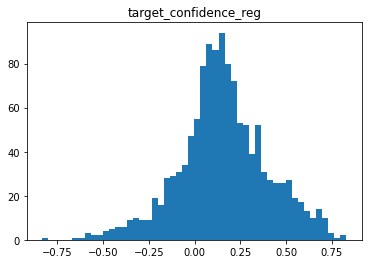

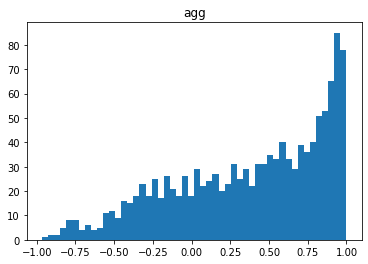

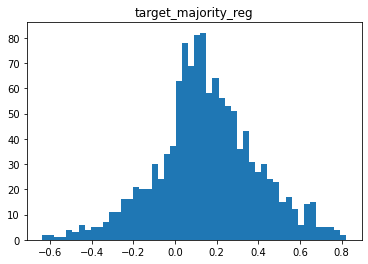

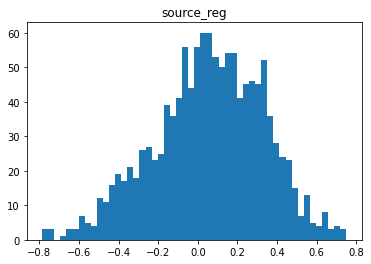

In [10]:
exclude_method = set(['target_majority_vote', 'iwv', 'dev'])
make_corr_coeff_histograms_for_ensemble_methods(res_df, exclude_methods=exclude_method)

#### Boxplot of correlation coefficients of all methods over all datasets

In [11]:
def make_corr_coeff_boxplots_for_ensemble_methods(res_df: pd.DataFrame,
                                                  exclude_methods: Set[str] = [],
                                                  title: str = 'Boxplot of correlation coefficient for every method'):
    res_df = res_df.dropna()
    ensemble_methods = set(res_df.index.get_level_values('ensemble_methods').unique())
    ensemble_methods = ensemble_methods - exclude_methods
    corr_coeffs_per_em = [
        res_df.xs(key=em, level='ensemble_methods')['corr_coeff'].to_numpy() for em in ensemble_methods
    ]
    f, ax = plt.subplots()
    plt.boxplot(x=corr_coeffs_per_em, labels=ensemble_methods)
    ax.set_ylim(-1, 1)
    ax.set_title(title)
    f.autofmt_xdate()
    return f

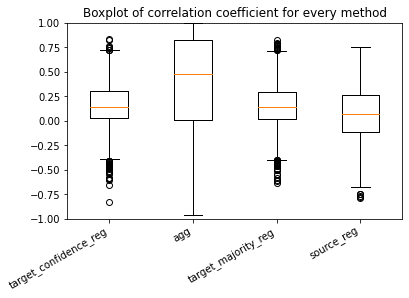

In [12]:
exclude_methods = set(['target_majority_vote', 'iwv', 'dev'])
f = make_corr_coeff_boxplots_for_ensemble_methods(res_df.dropna(), exclude_methods=exclude_methods)

In [13]:
# f.savefig('./boxplot_all_methods.png', dpi=300, bbox_inches='tight')

#### Boxplots correlation coefficient of IWA for each dataset 

In [14]:
def make_corr_coeff_boxplots_for_iwa_per_dataset(res_df: pd.DataFrame, title: str = 'Boxplot of Correlation Coeffiecient for IWA per Dataset'):
    res_df = res_df.dropna()
    agg_df = res_df.xs(key='agg', level='ensemble_methods')
    datasets = list(agg_df.index.get_level_values('dataset').unique())
    corr_coeffs_per_dataset = [agg_df.xs(key=ds, level='dataset')['corr_coeff'].to_numpy() for ds in datasets]
    f, ax = plt.subplots()
    plt.boxplot(x=corr_coeffs_per_dataset, labels=datasets)
    ax.set_ylim(-1,1)
    ax.set_title(title)
    f.autofmt_xdate()
    return f

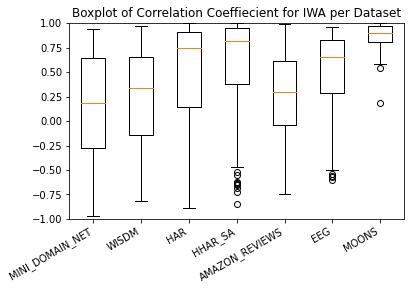

In [15]:
f = make_corr_coeff_boxplots_for_iwa_per_dataset(res_df)

In [16]:
# f.savefig('./boxplot_iwa_datasets.png', dpi=300, bbox_inches='tight')

#### Tables of correlation coefficents

In [17]:
# show mean correlation coefficient per dataset
mean_corr_per_dataset = res_df.xs(key='agg', level='ensemble_methods').groupby(['dataset']).mean().style\
    .background_gradient(cmap=cm, subset=['corr_coeff'], vmin=-1, vmax=1)\
    .highlight_between(subset=['p_val'], left=0, right=0.05, color='red')
mean_corr_per_dataset

,corr_coeff,p_val,ci_low,ci_high
dataset,,,,
AMAZON_REVIEWS,0.290030,0.299819,-0.154834,0.660890
EEG,0.507421,0.142566,0.105280,0.777938
HAR,0.509774,0.159181,0.184226,0.750323
HHAR_SA,0.572653,0.097914,0.286922,0.781954
MINI_DOMAIN_NET,0.138389,0.313145,-0.436618,0.646811
MOONS,0.846392,0.019876,0.627554,0.945901
WISDM,0.268681,0.237928,-0.169811,0.633070


In [18]:
# save table
# import dataframe_image as dfi
# dfi.export(mean_corr_per_dataset, 'mean_corr_per_dataset.png', dpi=300)

In [19]:
# show mean correlation coefficient per dataset + da_method
mean_corr_per_dataset_dam = res_df.xs(key='agg', level='ensemble_methods').groupby(['dataset', 'da_method']).mean().style\
    .background_gradient(cmap=cm, subset=['corr_coeff'], vmin=-1, vmax=1)\
    .highlight_between(subset=['p_val'], left=0, right=0.05, color='red')
mean_corr_per_dataset_dam

In [20]:
# save table
# import dataframe_image as dfi
# dfi.export(mean_corr_per_dataset_dam, 'mean_corr_per_dataset_dam.png', dpi=300)

In [21]:
# show only our method (IWA), here denoted as 'agg'
all_corr_df = res_df.xs(key='agg', level='ensemble_methods').style\
    .background_gradient(cmap=cm, subset=['corr_coeff'], vmin=-1, vmax=1)\
    .highlight_between(subset=['p_val'], left=0, right=0.05, color='red')
all_corr_df

In [22]:
# save table
# import dataframe_image as dfi
# dfi.export(all_corr_df, 'all_corr_iwa.png', dpi=100, max_rows=-1)

In [23]:
# show all correlation results
# res_df.swaplevel(2,3).style\
#     .background_gradient(cmap=cm, subset=['corr_coeff'], vmin=-1, vmax=1)\
#     .highlight_between(subset=['p_val'], left=0, right=0.05, color='red')